In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [2]:
data = pd.read_csv("Air_Quality.csv")
data.head()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,179772,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,409.0,Southeast Queens,2015,01/01/2015,0.3,NaN
1,179785,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,209.0,Bensonhurst - Bay Ridge,2015,01/01/2015,1.2,NaN
2,178540,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209.0,Bensonhurst - Bay Ridge,Annual Average 2012,12/01/2011,8.6,NaN
3,178561,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Annual Average 2012,12/01/2011,8.0,NaN
4,823217,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Summer 2022,06/01/2022,6.1,NaN


In [3]:
# Dropping some columns
data.drop(['Message'], axis=1, inplace=True)

In [4]:
data.tail()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
18020,816914,643,Annual vehicle miles traveled,Million miles,per square mile,CD,503.0,Tottenville and Great Kills (CD3),2019,01/01/2019,12.9
18021,816913,643,Annual vehicle miles traveled,Million miles,per square mile,CD,503.0,Tottenville and Great Kills (CD3),2010,01/01/2010,14.7
18022,816872,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,208.0,Canarsie - Flatlands,2010,01/01/2010,43.4
18023,816832,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,407.0,Southwest Queens,2010,01/01/2010,65.8
18024,151658,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,408.0,Jamaica,2005,01/01/2005,41.0


In [5]:
data.shape

(18025, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18025 entries, 0 to 18024
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       18025 non-null  int64  
 1   Indicator ID    18025 non-null  int64  
 2   Name            18025 non-null  object 
 3   Measure         18025 non-null  object 
 4   Measure Info    18025 non-null  object 
 5   Geo Type Name   18025 non-null  object 
 6   Geo Join ID     18016 non-null  float64
 7   Geo Place Name  18016 non-null  object 
 8   Time Period     18025 non-null  object 
 9   Start_Date      18025 non-null  object 
 10  Data Value      18025 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 1.5+ MB


In [7]:
data.describe()

,Unique ID,Indicator ID,Geo Join ID,Data Value
count,18025.000000,18025.000000,1.801600e+04,18025.000000
mean,426387.692705,434.830180,5.906303e+05,21.428616
std,250489.450630,115.852371,7.769549e+06,23.999345
min,121644.000000,365.000000,1.000000e+00,0.000000
25%,175303.000000,365.000000,2.020000e+02,8.900000
50%,410803.000000,375.000000,3.030000e+02,15.200000
75%,649893.000000,386.000000,4.040000e+02,26.700000
max,828353.000000,661.000000,1.051061e+08,424.700000


In [8]:
# Checking the missing values in dataset

print("Missing value?", data.isnull().values.any())

Missing value? True


In [9]:
data.isnull().sum()

Unique ID         0
Indicator ID      0
Name              0
Measure           0
Measure Info      0
Geo Type Name     0
Geo Join ID       9
Geo Place Name    9
Time Period       0
Start_Date        0
Data Value        0
dtype: int64

In [10]:
# Removing the missing values from dataset
data.dropna(axis=0,inplace= True)

In [11]:
# Check for the Duplicate Data
data.duplicated().any()

False

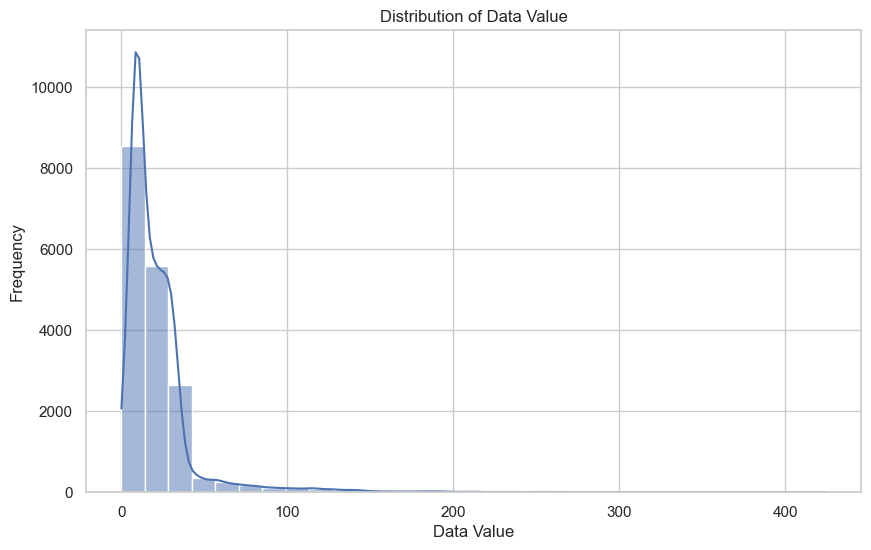

In [12]:
# Visualizing the distribution of the 'Data Value'
plt.figure(figsize=(10, 6))
sns.histplot(data['Data Value'], bins=30, kde=True)
plt.title('Distribution of Data Value')
plt.xlabel('Data Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

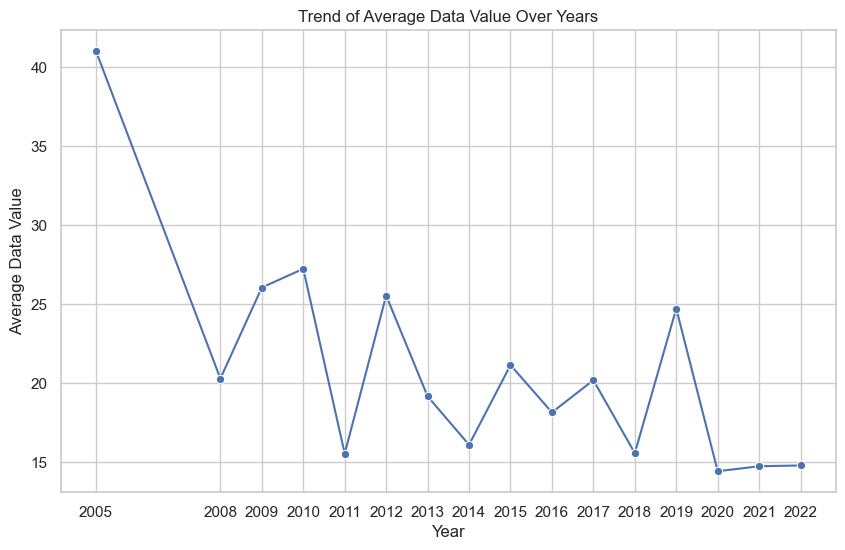

In [13]:
# Converting 'Start_Date' to datetime format

data['Start_Date'] = pd.to_datetime(data['Start_Date'], errors='coerce')

# Grouping the data by year and calculating the mean 'Data Value'
trend_data = data.groupby(data['Start_Date'].dt.year)['Data Value'].mean().reset_index()

# Visualizing the trend over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=trend_data, x='Start_Date', y='Data Value', marker='o')
plt.title('Trend of Average Data Value Over Years')
plt.xlabel('Year')
plt.ylabel('Average Data Value')
plt.grid(True)
plt.xticks(trend_data['Start_Date'])
plt.show()

In [14]:
# Grouping the data by 'Geo Place Name' and calculating the mean 'Data Value'
geo_data = data.groupby('Geo Place Name')['Data Value'].mean().reset_index()

# Sorting the data by 'Data Value' in descending order
geo_data = geo_data.sort_values(by='Data Value', ascending=False)

# Displaying the top 10 locations with the highest average 'Data Value'
print(geo_data.head(10))

                           Geo Place Name  Data Value
47               High Bridge - Morrisania   38.978235
50               Hunts Point - Mott Haven   37.553529
23                       Crotona -Tremont   36.990588
28                            East Harlem   34.569517
17   Central Harlem - Morningside Heights   33.370632
11                                  Bronx   30.978824
62                              Manhattan   30.252941
42            Gramercy Park - Murray Hill   30.012941
100        Union Square - Lower East Side   29.380000
95   Stuyvesant Town and Turtle Bay (CD6)   29.014545


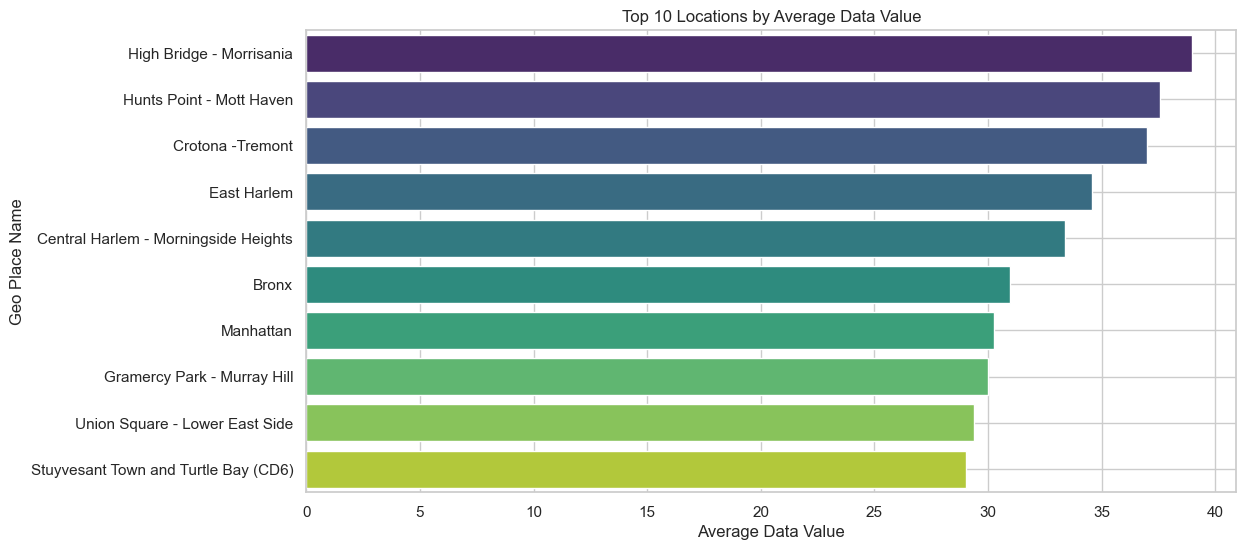

In [15]:
# Visualizing the average 'Data Value' for the top geographical locations
plt.figure(figsize=(12, 6))
sns.barplot(data=geo_data.head(10), x='Data Value', y='Geo Place Name', palette='viridis')
plt.title('Top 10 Locations by Average Data Value')
plt.xlabel('Average Data Value')
plt.ylabel('Geo Place Name')
plt.grid(True)
plt.show()

In [16]:
# Trend over time for a major pollutant (e.g., PM 2.5)
# Filter for PM 2.5 entries
pm25_data = data[data['Name'] == 'Fine particles (PM 2.5)']

In [17]:
# Convert 'Start_Date' to datetime
pm25_data['Start_Date'] = pd.to_datetime(pm25_data['Start_Date'], errors='coerce')

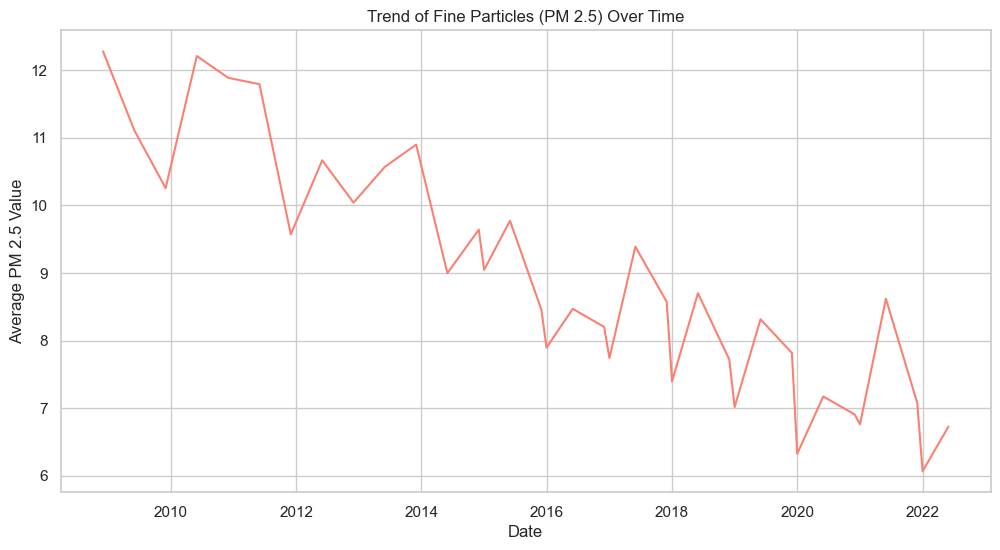

In [18]:
# Average PM2.5 levels over time
pm25_time_series = pm25_data.groupby('Start_Date')['Data Value'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=pm25_time_series, x='Start_Date', y='Data Value', color="salmon")
plt.title("Trend of Fine Particles (PM 2.5) Over Time")
plt.xlabel("Date")
plt.ylabel("Average PM 2.5 Value")
plt.show()

In [19]:
# Extracting the season 
data['Start_Date'] = pd.to_datetime(data['Start_Date'], errors='coerce')
data['Year'] = data['Start_Date'].dt.year
data['Month'] = data['Start_Date'].dt.month

# Defining the season 
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

data['Season'] = data['Month'].apply(assign_season)

In [20]:
# Seasonal average of major pollutants (focus on PM 2.5 and SO2 for example)
seasonal_trends = data[data['Name'].isin(['Fine particles (PM 2.5)', 
                                                          'Boiler Emissions- Total SO2 Emissions'])]
seasonal_avg = seasonal_trends.groupby(['Year', 'Season', 'Name'])['Data Value'].mean().unstack()

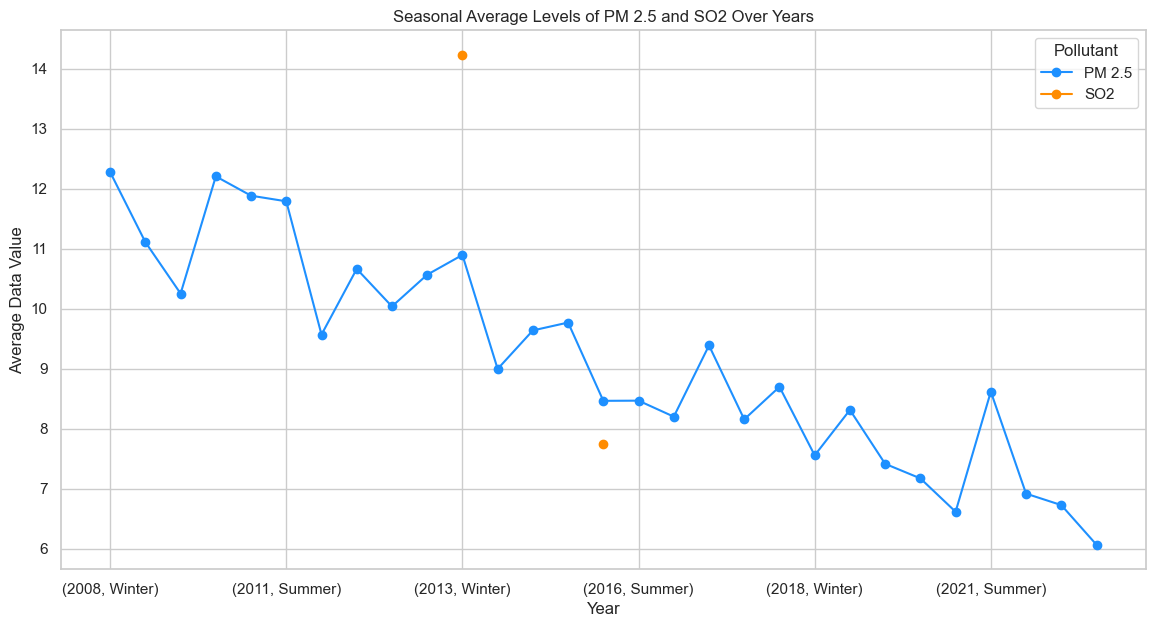

In [21]:
# Plot seasonal trends over years for PM 2.5 and SO2
plt.figure(figsize=(14, 7))
seasonal_avg['Fine particles (PM 2.5)'].plot(marker='o', linestyle='-', label='PM 2.5', color='dodgerblue')
seasonal_avg['Boiler Emissions- Total SO2 Emissions'].plot(marker='o', linestyle='-', label='SO2', color='darkorange')
plt.title("Seasonal Average Levels of PM 2.5 and SO2 Over Years")
plt.xlabel("Year")
plt.ylabel("Average Data Value")
plt.legend(title="Pollutant")
plt.grid(True)
plt.show()

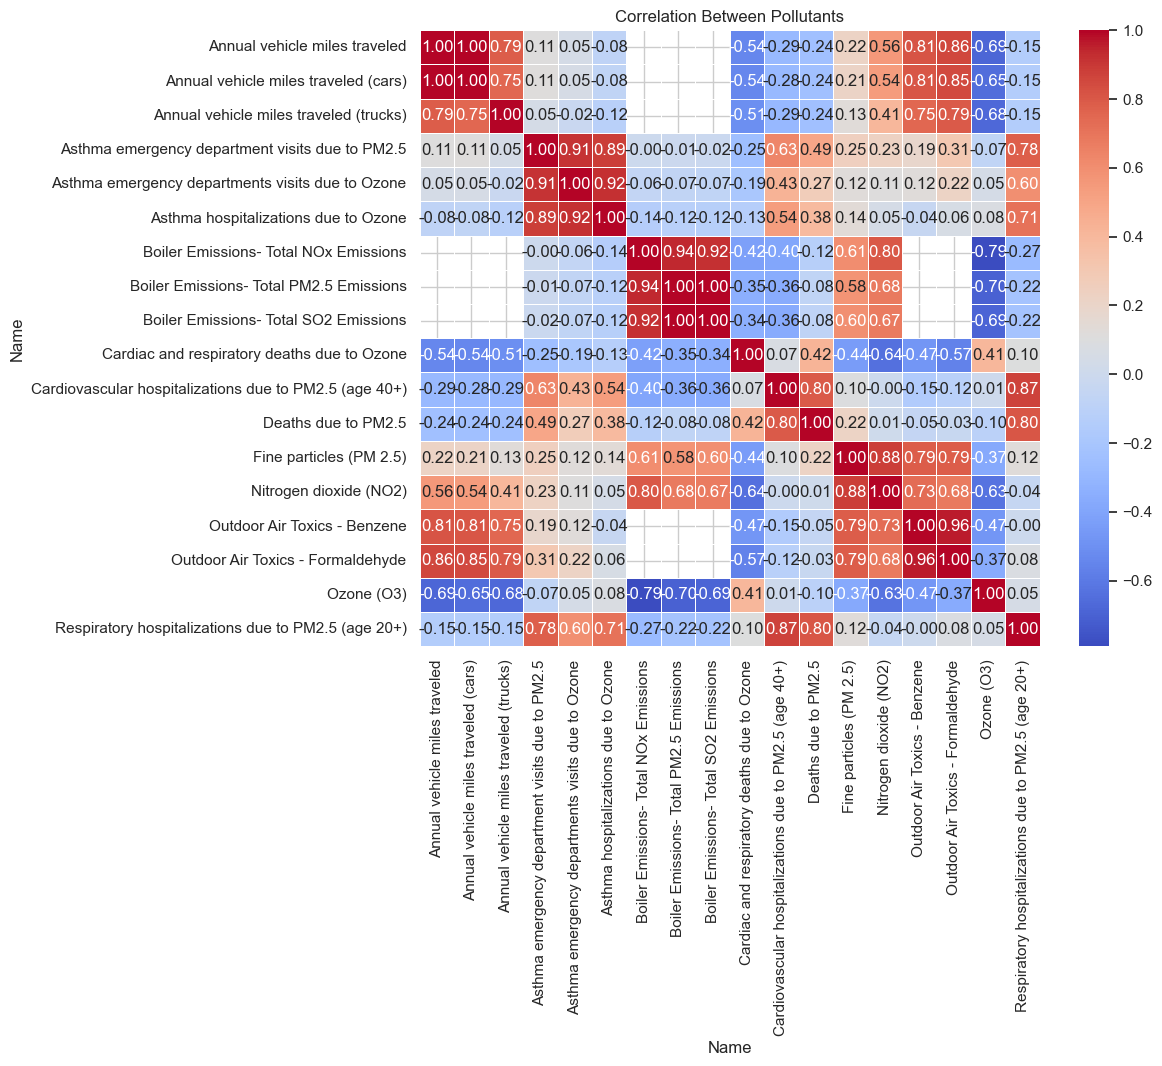

In [22]:
# Examining correlation among pollutants by grouping data by year and indicator, then pivoting for correlation matrix
pollutant_data = data.pivot_table(index=['Year', 'Geo Place Name'], 
                                          columns='Name', 
                                          values='Data Value', 
                                          aggfunc='mean')
pollutant_correlation = pollutant_data.corr()

# Heatmap for correlations
plt.figure(figsize=(10, 8))
sns.heatmap(pollutant_correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Between Pollutants")
plt.show()